In [1]:

import librosa
import numpy as np
import matplotlib.pyplot as plt
from util_functions import *

In [2]:
existing_dir = "/opt/research/AudioSteno/datasets/maestro/generatedAudio"
all_files_to_process = walk_dir(existing_dir)
#Extract all files that aren't .wav
files_to_process = []
for file in all_files_to_process:
    if str(file[-3:]) == "wav":
        files_to_process.append(file)
files_to_processNoOnes = sorted(files_to_process)


In [3]:
existing_dir = "/opt/research/AudioSteno/datasets/maestrowithones/generatedAudio"
all_files_to_process = walk_dir(existing_dir)
#Extract all files that aren't .wav
files_to_process = []
for file in all_files_to_process:
    if str(file[-3:]) == "wav":
        files_to_process.append(file)
files_to_processOnes = sorted(files_to_process)

In [4]:
from EchoHiding.echohiding import echo_hide_single, get_cepstrum



def get_zscore(x, idx):
    """
    Compute the p-value of an array at an index with
    respect to the distribution excluding that index
    """
    y = np.concatenate((x[0:idx], x[idx+1:]))
    mu = np.mean(y)
    std = np.std(y)
    return (x[idx]-mu)/std

comparing = []
allfiles = (files_to_processNoOnes, files_to_processOnes)
for selection in range(len(allfiles)):
    z_scores = []
    for i in range(len(allfiles[selection])):
        audio = allfiles[selection][i]
        x, sr = librosa.load(audio)

        cepstrum_x = get_cepstrum(x)
        z_score = get_zscore(cepstrum_x, 75)
        z_scores.append(z_score)
        print ("{} percent complete".format(int(i/len(files_to_process)*100)), end="\r")
    comparing.append(z_scores)
        


[[-2.1383995562679545, 0.34688158368993666, -1.3116483011428315, 0.3817898044107417, -0.6104775724883125, -0.8657793561911514, -0.024847343176539523, 0.3837753099219211, -1.52884933000435, 1.2745194475961255, 0.029736916607778177, -1.1075100382242704, -0.05626211164213811, -1.4259775622335102, -1.7639889569688643, -2.762836103161278, 0.47670590367744886, -2.416995083104439, 0.3521253520084561, -1.296311388989853, 0.5993361583847492, 0.08648760936991177, 0.8443662781675517, -0.247200802190833, -0.8990466477767912, 0.30789096786524955, 0.628160977633601, 0.09082405747125795, -2.754579400897488, -0.4217555566517933, -0.35658636368123087, 0.3599153395142744, 0.8918871876138128, -0.4210291124913637, 0.26083916820182207, -1.333448773850348, 0.8740963136854114, 0.18665955727334602, 0.7285458328450214, -1.8229795980826828, -0.04839865125452378, -0.4245268359340167, 0.9598374437948135, -0.4746799711996282, -0.2813524021887556, -0.651993515320056, -0.6072570985100932, -0.6313214141206452, 0.4338

Text(0.5, 1.0, 'Histogram of Z-Scores After Echo')

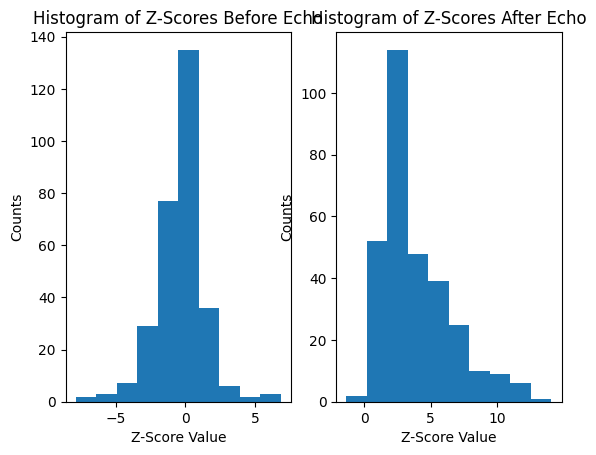

In [5]:
print(comparing)

plt.subplot(121)
plt.hist(comparing[0])
plt.xlabel("Z-Score Value")
plt.ylabel("Counts")
plt.title("Histogram of Z-Scores Before Echo")

plt.subplot(122)
plt.hist(comparing[1])
plt.xlabel("Z-Score Value")
plt.ylabel("Counts")
plt.title("Histogram of Z-Scores After Echo")

In [7]:
file_path = '/opt/research/AudioSteno/codeShare/z_scores.txt'

# Write data to text file
with open(file_path, 'w') as file:
    for row in comparing:
        file.write('\t'.join(map(str, row)) + '\n')

print("Data has been saved to:", file_path)

Data has been saved to: /opt/research/AudioSteno/codeShare/z_scores.txt


In [ ]:
from EchoHiding.echohiding import echo_hide_single, get_cepstrum
existing_dir = "/opt/research/datasets/maestrowithones/generatedAudio/"
all_files_to_process = walk_dir(existing_dir)
#Extract all files that aren't .wav
files_to_process = []
for file in all_files_to_process:
    if str(file[-3:]) == "wav":
        files_to_process.append(file)

def get_zscore(x, idx):
    """
    Compute the p-value of an array at an index with
    respect to the distribution excluding that index
    """
    y = np.concatenate((x[0:idx], x[idx+1:]))
    mu = np.mean(y)
    std = np.std(y)
    return (x[idx]-mu)/std

z_score_with_ones = []

for file in files_to_process:    
    x, sr = librosa.load(file)
    cepstrum_x = get_cepstrum(x)
    z_score_with_ones.append(get_zscore(cepstrum_x, 75))

In [ ]:
from EchoHiding.echohiding import echo_hide_single, get_cepstrum
existing_dir = "/opt/research/datasets/maestro/generatedAudio/"
all_files_to_process = walk_dir(existing_dir)
#Extract all files that aren't .wav
files_to_process = []
for file in all_files_to_process:
    if str(file[-3:]) == "wav":
        files_to_process.append(file)

def get_zscore(x, idx):
    """
    Compute the p-value of an array at an index with
    respect to the distribution excluding that index
    """
    y = np.concatenate((x[0:idx], x[idx+1:]))
    mu = np.mean(y)
    std = np.std(y)
    return (x[idx]-mu)/std

z_score_without_ones = []
for file in files_to_process:
    x, sr = librosa.load(file)
    cepstrum_x = get_cepstrum(x)
    z_score_without_ones.append(get_zscore(cepstrum_x, 75))

In [ ]:
for i in range(len(z_score_without_ones)):
    print("{} Z-Score Before: {:.3f} | Z-Score After: {:.3f}".format(files_to_process[i][files_to_process[i].rfind('/')+1:-4], z_score_without_ones[i], z_score_with_ones[i]))

ellipse Z-Score Before: 0.271 | Z-Score After: 9.604
eq_triangle Z-Score Before: -0.488 | Z-Score After: 7.841
rectangle Z-Score Before: 1.061 | Z-Score After: 8.080
